<a href="https://colab.research.google.com/github/bee-llel/Machine-Learning/blob/master/FeedForwardNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HAKEM Billel
Pierre-Alexandre Rebuffi
Valdrin Kelmendi

In [38]:
#librairy:
import pandas as pd # used to manipulate the data 
import numpy as np
import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *

In [39]:
#loading the data in a dataframe

data = pd.read_csv('data_ffnn_3classes.txt', sep=" ", header=None)

In [40]:
data.columns = ['feature1','feature2','target']
data.head(10)

,feature1,feature2,target
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0
5,4.0150,3.1937,1.0
6,3.3814,3.4291,1.0
7,3.9113,4.1761,1.0
8,2.7822,4.0431,1.0
9,2.5518,4.6162,1.0


In [41]:
#variable definition: first we will take the exercice values then we will generalize our function once it is working

##############################
#
#N = number of feature = 2
N = 2
#
#I = data size = 71
I = 71
#
#J = output dimension = 3
J = 3
#
#K = number of hidden neuron = how many we want
K =3

#############################
#target matrix: data['target'] is actually our target matrix
#in order to compute the SSE with our estimation G we have to transform it into an array of the same shape
#In order to do that we will use dummy variable and more precisely the get_dummies from pandas librairy
# this will separate the categorical data (0.0 1.0 and 2.0) in three colummns.
# the first column will contain a 1 for every 0.0 in our data
# the second column will contain a 1 for every 1.0 in our data 
# and it's the same for the third column which will contain a 1 for every 2.0 in our data
y = pd.get_dummies(data['target']).to_numpy()

#############################
#feature matrix:
X = data[['feature1','feature2']].to_numpy()



In [42]:
#forward propagation function:
def forwardprop(X,N,I,J,K,W,V):

####################################
#bias matrix
#dimension I*1
  B = np.ones(((X.T).shape[1],1))

#############################
# X completed with the bias
# dimension: I*N+1
  X_b = np.concatenate((B,X),axis = 1)

#############################
# X_b  computed with the hidden neurons = X_bv
# dimension I*K
  X_bv = np.matmul(X_b,V)

#############################
# define sigmoid of X_bv 
# dimension : I*K
  F = 1 / (1 + exp(-X_bv))

#############################
# complete our F with new bias which is still equal to one in our project
#dimension :
  F_b = np.concatenate((B,F),axis = 1)

#############################
# F_b computed with the hidden weight W
# dimension : I*J
  F_bw = np.matmul(F_b,W)

  #X I*N #B I*1 #X_b I*N+1 #X_bv I*K #F_b I*K+1 #F_bv I*J #G I*J
############################
# G after F_bw has been imputed to the sigmoid
# dimension : I*J
  G  = 1.0 / (1.0 + exp(-F_bw))

############################################
#backpropagation:
  return [X_b,F,F_b,G]

In [43]:
#Sum of square error SSE:
#found this method on SO
def SSE(A,B):
 # E = 0.5*(((A-B)).sum())**
  E = 1 / 2 * np.sum((A - B)**2)
  return E


In [44]:
#backpropagation function:
def backprop(W,V,y,G,X_b,F,F_b,alpha1,alpha2):
  
  #W
  for k in range(K+1):
    for j in range(J):
      W[k][j] = W[k][j] - alpha1*((G[:,j]-y[:,j])*G[:,j]*(np.ones(G.shape)[:,j]-G[:,j])*F_b[:,k]).sum(axis =0)

############################################
  #V
  for k in range (K):
    for f in range(N+1):
      i=0
      for j in range(J):    
        i = i + ((G[:,j] - y[:,j]) * G[:,j] * (1-G[:,j])) * W[k+1,j] * F[:,k] * (1 - F[:,k]) * X_b[:,f]
      V[f,k]= V[f,k]- alpha2* np.sum(i)

  return [W,V]
#############################################

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
error 0.11518579627263104
error 0.11508533159500897
error 0.11498552172457008
error 0.11488635483298328
error 0.1147878194095476
error 0.11468990418942099
error 0.11459259819858317
error 0.11449589069893933
error 0.11439977122053574
error 0.11430422951935808
error 0.11420925560006352
error 0.11411483968334177
error 0.11402097222161693
error 0.11392764387361082
error 0.11383484551487093
error 0.11374256821776244
error 0.11365080325819948
error 0.113559542099746
error 0.11346877639758182
error 0.11337849798570959
error 0.11328869887892731
error 0.11319937126240799
error 0.11311050749222902
error 0.113022100086772
error 0.11293414172623392
error 0.1128466252454226
error 0.11275954363256566
error 0.11267289002317975
error 0.1125866576984103
error 0.11250084007973629
error 0.11241543072699961
error 0.1123304233337782
error 0.11224581172522283
error 0.11216158985395949
error 0.11207775179782027
error 0.111994291756

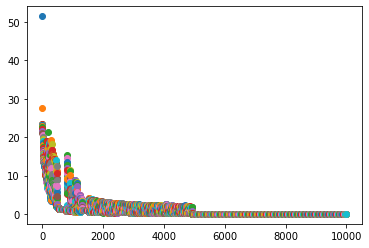

In [47]:
#FFNN function: can take a bit of time to reach 10000 iteration



#############################
# W and V matrix: we will initialize them to random value between 0 and 1 time 0.1 
# i have read that it is useful to multiply them by a small coefficient, so we will start with that.
# it seem they are some kind of neurons so their dimension has to be number of feature + 1 (for the bias) x K for the hidden layer V
V = np.random.rand(N+1,K) 
# Since W is our output its dimension has to be the dimension of the previous output + 1 for the bias
# time the output dimension which is J 
W = np.random.rand(K+1,J) 

# depending on the alpha we can have a more or less smooth convergence, with alpha = 0.01 it's a slow but steady convergence
# while with alpha = 0.1 it's a really fast convergence but the error can increase at some iteration, as shown in the scatter plot below 
for i in range (10000):
  X_b,F,F_b,G = forwardprop(X,2,71,3,5,W,V)
  W,V = backprop(W,V,y,G,X_b,F,F_b,0.1,0.1)
  plt.scatter(i,SSE(y,G))
  print("error", SSE(y,G))
plt.show()

In [48]:
#data visualisation: Once the FFNN has been running for around 10000 iteration, we can see that our estimation contained in the G matrix is nearly the same as
#our data y. 
print("here is our estimation")
print(G)
print("here is the true data")
print(y)

here is our estimation
[[1.32045573e-03 9.99120245e-01 2.87855550e-03]
 [1.37210075e-03 9.99084409e-01 2.87830301e-03]
 [1.32023972e-03 9.99120230e-01 2.87870326e-03]
 [1.42288677e-03 9.99048511e-01 2.87876594e-03]
 [4.90390698e-02 9.20213030e-01 4.70796338e-03]
 [7.97091467e-04 9.98785667e-01 5.03431207e-03]
 [1.38584403e-03 9.99069654e-01 2.88846144e-03]
 [1.31969949e-03 9.99120043e-01 2.87988117e-03]
 [1.32186363e-03 9.99119217e-01 2.87859747e-03]
 [1.32026956e-03 9.99120248e-01 2.87866820e-03]
 [1.32084206e-03 9.99119691e-01 2.87901094e-03]
 [2.71704248e-02 9.78671642e-01 2.90101318e-03]
 [1.34788561e-03 9.99101429e-01 2.87823628e-03]
 [1.32072717e-03 9.99120046e-01 2.87856304e-03]
 [1.79478455e-03 9.98786681e-01 2.87821383e-03]
 [1.32027424e-03 9.99120213e-01 2.87870211e-03]
 [1.31960230e-03 9.99119626e-01 2.88097754e-03]
 [1.24670873e-03 9.99084388e-01 3.07432448e-03]
 [1.86370643e-03 9.98542570e-01 3.16321996e-03]
 [2.12173161e-03 9.98551511e-01 2.88120914e-03]
 [9.69434567e-01 

In [49]:
#result: you need to run above to get the correct V and W
print("this is the optimal hidden layer V")
print(W)
print("this is the optimal output layer W")
print(V)

this is the optimal hidden layer V
[[-1.75156349e+00 -6.14424686e+00  2.71714775e+00]
 [-2.94886233e+00 -5.34486148e+00  2.30216393e+00]
 [ 1.08653585e+01  5.11871264e+00 -1.08696175e+01]
 [-1.27937921e+01  1.34055642e+01  2.71062417e-03]]
this is the optimal output layer W
[[  0.51943978   3.46313699 -38.59398908]
 [  1.31847959  -5.57655633   3.41458163]
 [  1.58399108   6.83767554   9.49233695]]


In [50]:
###########################################
#TEST DATA FOR X1,X2 = (2,2)
X1 = array([[2,2]])
X_b,F,F_b,G = forwardprop(X1,2,71,3,5,W,V)
print(G)
print("We can see that our prediction is a 0")

[[0.99785595 0.00170303 0.0029378 ]]
We can see that our prediction is a 0


In [51]:
#TEST DATA FOR X1,X2 = (4,4)
X2 = array([[4,4]])
X_b,F,F_b,G = forwardprop(X2,2,71,3,5,W,V)
print(G)
print("We can see that our prediction is a 1")

[[0.00131709 0.9991195  0.00288479]]
We can see that our prediction is a 1


In [52]:
#TEST DATA FOR X1,X2 = (4.5,1.5)
X3 = array([[4.5,1.5]])
X_b,F,F_b,G = forwardprop(X3,2,71,3,5,W,V)
print(G)
print("We can see that our prediction is a 2")

[[9.00023210e-03 1.02666890e-05 9.93431307e-01]]
We can see that our prediction is a 2
